In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

In [37]:
# 设置中文字体
plt.rcParams["font.family"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 数据预处理
首先进行数据预处理，首先是数据探索与清洗

In [38]:
data = pd.read_csv('./weather_classification_data.csv')
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


对Temperature、Humidity、Wind Speed、Atmospheric Pressure、Visibility这几个数据列进行绘制子图

In [39]:
data1 = data[
    ['Temperature', 'Humidity', 'Wind Speed', 'Cloud Cover', 'Atmospheric Pressure', 'Season', 'Visibility (km)',
     'Location', 'Weather Type']].copy()

Text(0, 0.5, '能见度')

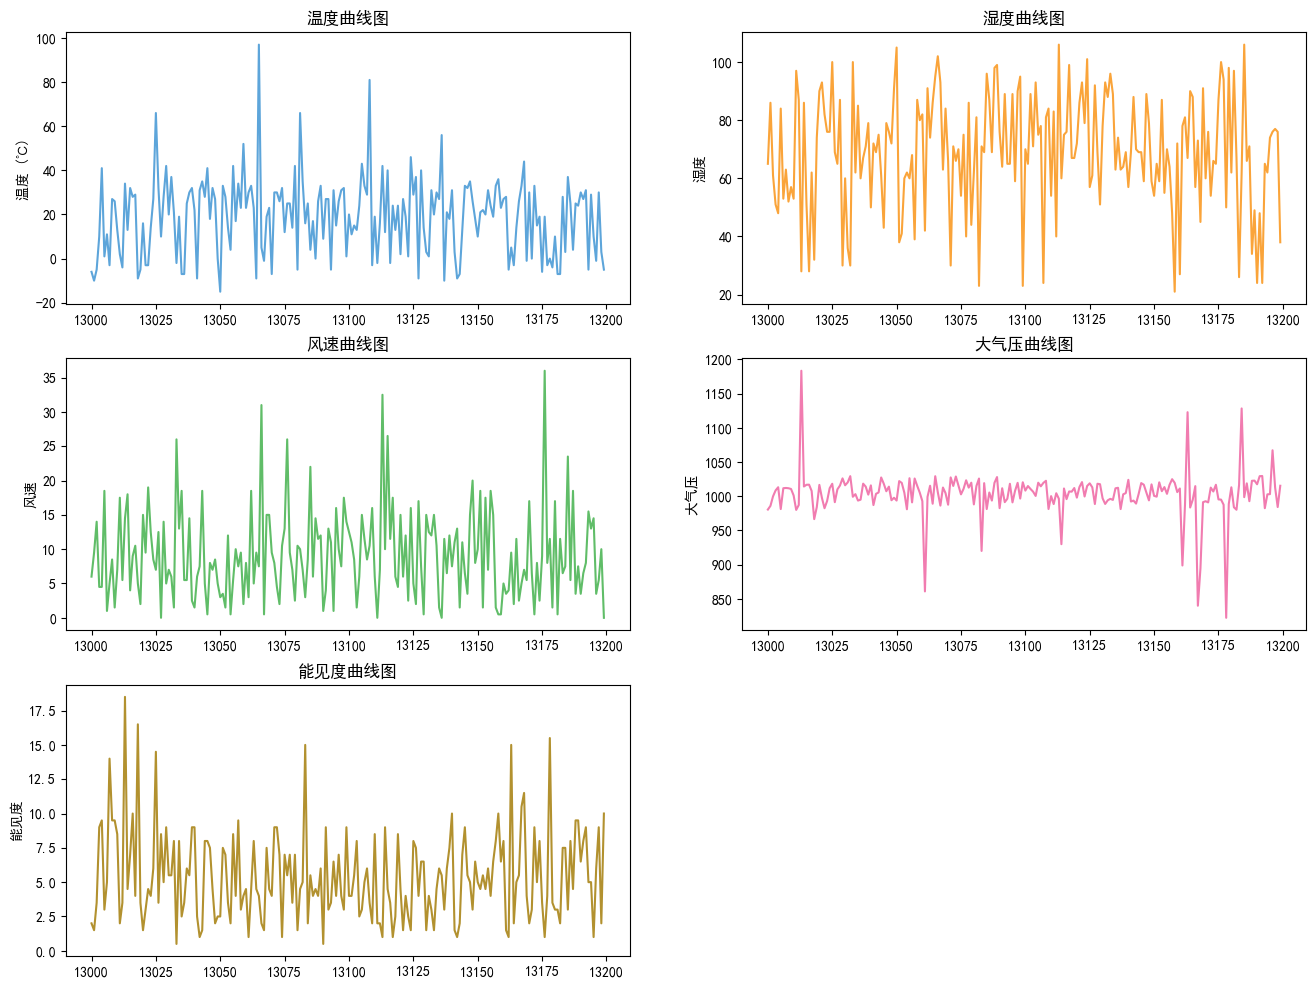

In [40]:
# 定义颜色方案
colors = ['#5DA5DA', '#FAA43A', '#60BD68', '#F17CB0', '#B2912F']

plt.figure(figsize=(16, 12))
gs = GridSpec(ncols=2, nrows=3, figure=plt.gcf())

# 绘制1温度曲线图
ax1 = plt.subplot(gs[0, 0])
sns.lineplot(data1['Temperature'][-200:], color=colors[0], ax=ax1)
ax1.set_title('温度曲线图')
ax1.set_ylabel('温度 (℃)')

# 绘制2湿度曲线图
ax2 = plt.subplot(gs[0, 1])
sns.lineplot(data1['Humidity'][-200:], color=colors[1], ax=ax2)
ax2.set_title('湿度曲线图')
ax2.set_ylabel('湿度')

# 绘制3风速曲线图
ax3 = plt.subplot(gs[1, 0])
sns.lineplot(data1['Wind Speed'][-200:], color=colors[2], ax=ax3)
ax3.set_title('风速曲线图')
ax3.set_ylabel('风速')

# 绘制4大气压曲线图
ax4 = plt.subplot(gs[1, 1])
sns.lineplot(data1['Atmospheric Pressure'][-200:], color=colors[3], ax=ax4)
ax4.set_title('大气压曲线图')
ax4.set_ylabel('大气压')

# 绘制5能见度曲线图
ax5 = plt.subplot(gs[2, 0])
sns.lineplot(data1['Visibility (km)'][-200:], color=colors[4], ax=ax5)
ax5.set_title('能见度曲线图')
ax5.set_ylabel('能见度')

对Cloud Cover、Season、Location、Weather Type这几个数据列进行绘制柱状图

Text(0, 0.5, '频数')

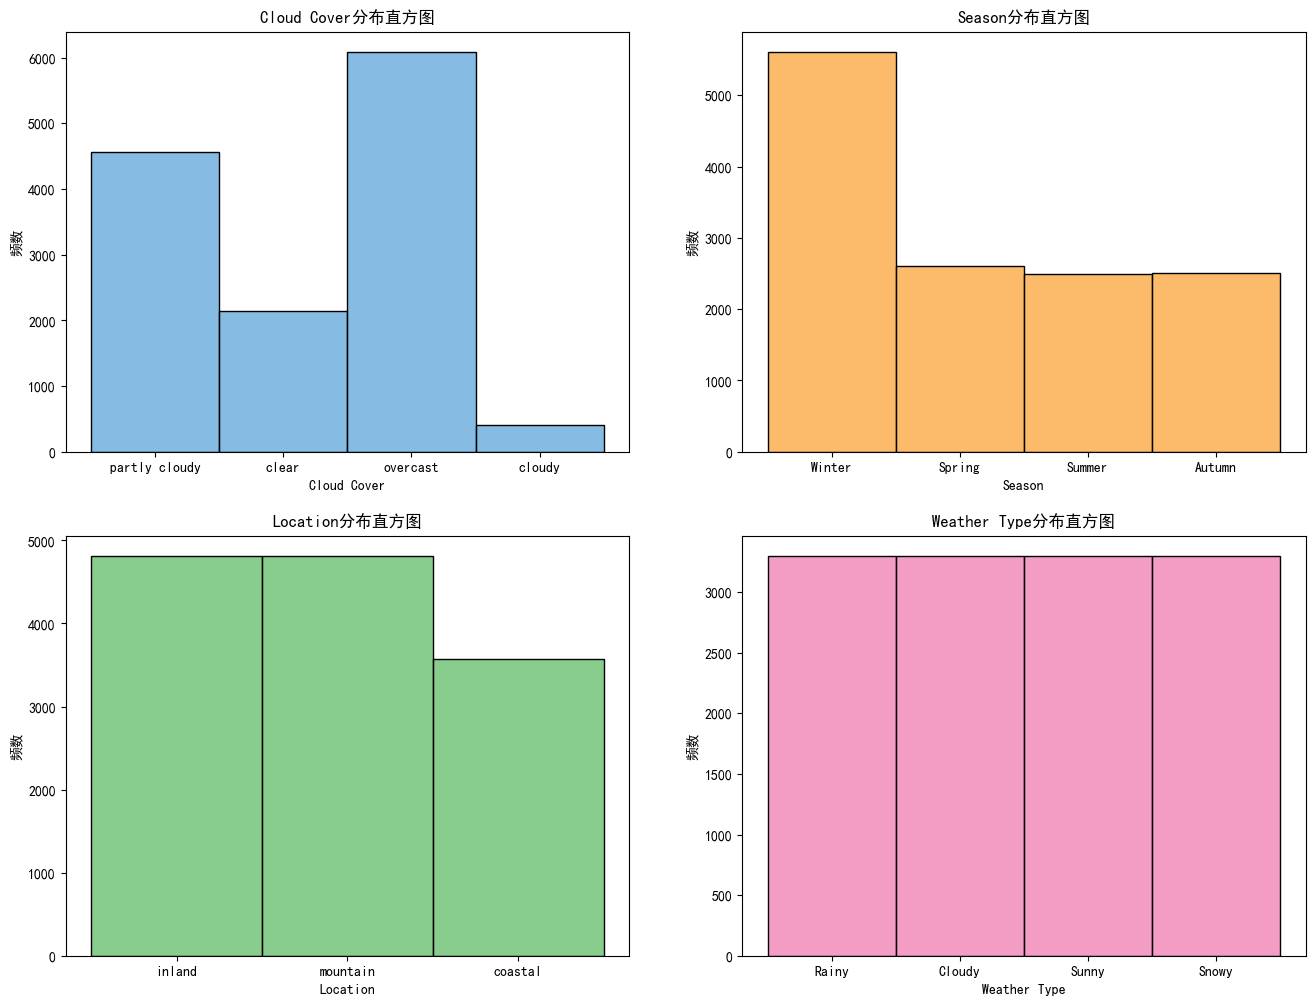

In [41]:
# 定义颜色方案
colors = ['#5DA5DA', '#FAA43A', '#60BD68', '#F17CB0', '#B2912F']

plt.figure(figsize=(16, 12))
gs = GridSpec(ncols=2, nrows=2, figure=plt.gcf())

# 1. Cloud Cover直方图
ax1 = plt.subplot(gs[0, 0])
sns.histplot(data1['Cloud Cover'], color=colors[0], ax=ax1)
ax1.set_title('Cloud Cover分布直方图')
ax1.set_xlabel('Cloud Cover')
ax1.set_ylabel('频数')

# 2. Season直方图
ax2 = plt.subplot(gs[0, 1])
sns.histplot(data1['Season'], color=colors[1], ax=ax2)
ax2.set_title('Season分布直方图')
ax2.set_xlabel('Season')
ax2.set_ylabel('频数')

# 3. Location直方图
ax3 = plt.subplot(gs[1, 0])
sns.histplot(data1['Location'], color=colors[2], ax=ax3)
ax3.set_title('Location分布直方图')
ax3.set_xlabel('Location')
ax3.set_ylabel('频数')

# 4. Weather Type直方图
ax4 = plt.subplot(gs[1, 1])
sns.histplot(data1['Weather Type'], color=colors[3], ax=ax4)
ax4.set_title('Weather Type分布直方图')
ax4.set_xlabel('Weather Type')
ax4.set_ylabel('频数')

对数据进行编号

In [81]:
# 创建编码器
le = LabelEncoder()
encoders = {}  # 用于保存目标列的编码器

data_one_hot = data1.copy()
target_columns = ['Cloud Cover', 'Season', 'Location', 'Weather Type']
for col in target_columns:
    if col == 'Weather Type':
        le = LabelEncoder()
        data_one_hot[col] = le.fit_transform(data_one_hot[col])
        encoders[col] = le  # 保存编码器
    else:
        data_one_hot[col] = le.fit_transform(data_one_hot[col])
data_one_hot

,Temperature,Humidity,Wind Speed,Cloud Cover,Atmospheric Pressure,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,3,1010.82,3,3.5,1,1
1,39.0,96,8.5,3,1011.43,1,10.0,1,0
2,30.0,64,7.0,0,1018.72,1,5.5,2,3
3,38.0,83,1.5,0,1026.25,1,1.0,0,3
4,27.0,74,17.0,2,990.67,3,2.5,2,1
...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,2,1003.15,2,1.0,2,1
13196,-1.0,76,3.5,1,1067.23,3,6.0,0,2
13197,30.0,77,5.5,2,1012.69,0,9.0,0,0
13198,3.0,76,10.0,2,984.27,3,2.0,1,2


对数据进行统计分析

In [82]:
data_one_hot[['Temperature', 'Humidity', 'Wind Speed', 'Atmospheric Pressure', 'Visibility (km)']].describe()

,Temperature,Humidity,Wind Speed,Atmospheric Pressure,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,1005.827896,5.462917
std,17.386327,20.194248,6.908704,37.199589,3.371499
min,-25.000000,20.000000,0.000000,800.120000,0.000000
25%,4.000000,57.000000,5.000000,994.800000,3.000000
50%,21.000000,70.000000,9.000000,1007.650000,5.000000
75%,31.000000,84.000000,13.500000,1016.772500,7.500000
max,109.000000,109.000000,48.500000,1199.210000,20.000000


In [83]:
data_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Cloud Cover           13200 non-null  int64  
 4   Atmospheric Pressure  13200 non-null  float64
 5   Season                13200 non-null  int64  
 6   Visibility (km)       13200 non-null  float64
 7   Location              13200 non-null  int64  
 8   Weather Type          13200 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 928.2 KB


In [84]:
data_one_hot[['Temperature', 'Humidity', 'Wind Speed', 'Atmospheric Pressure', 'Visibility (km)']].corr().round(2)

,Temperature,Humidity,Wind Speed,Atmospheric Pressure,Visibility (km)
Temperature,1.00,-0.21,-0.07,0.21,0.25
Humidity,-0.21,1.00,0.41,-0.12,-0.48
Wind Speed,-0.07,0.41,1.00,-0.08,-0.31
Atmospheric Pressure,0.21,-0.12,-0.08,1.00,0.12
Visibility (km),0.25,-0.48,-0.31,0.12,1.00


# 数据预处理

去除异常值的影响

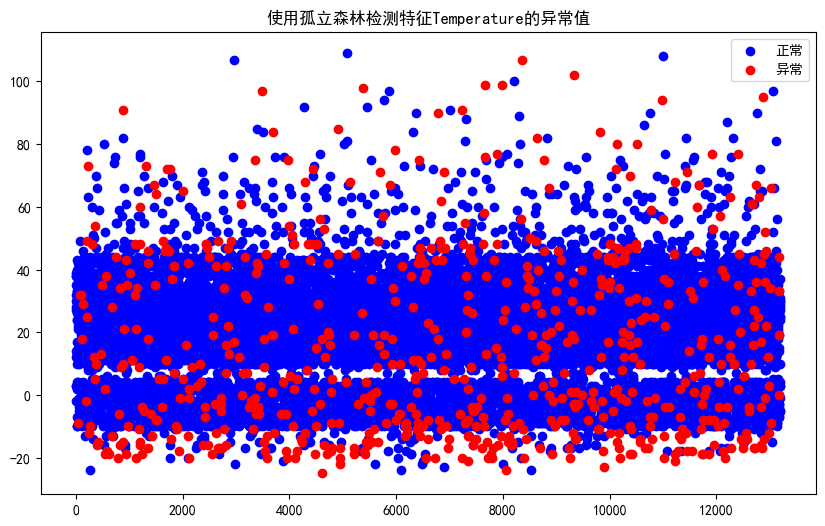

In [85]:
# 使用孤立森林检测异常值
clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(data_one_hot[['Temperature', 'Humidity', 'Wind Speed', 'Atmospheric Pressure', 'Visibility (km)']])

# 预测异常值 (-1表示异常，1表示正常)
data_one_hot['anomaly'] = clf.predict(
    data_one_hot[['Temperature', 'Humidity', 'Wind Speed', 'Atmospheric Pressure', 'Visibility (km)']])

# 可视化异常值
plt.figure(figsize=(10, 6))
plt.scatter(data_one_hot[data_one_hot['anomaly'] == 1].index, data_one_hot[data_one_hot['anomaly'] == 1]['Temperature'],
            c='blue', label='正常')
plt.scatter(data_one_hot[data_one_hot['anomaly'] == -1].index,
            data_one_hot[data_one_hot['anomaly'] == -1]['Temperature'], c='red', label='异常')
plt.title('使用孤立森林检测特征Temperature的异常值')
plt.legend()
plt.show()

# 删除异常值
data_cleaned_iforest = data_one_hot[data_one_hot['anomaly'] == 1].drop('anomaly', axis=1)

标准化和归一化

In [86]:
# 初始化标准化器
scaler = StandardScaler()
# 初始化归一化器（缩放到[0,1]）
normalizer = MinMaxScaler(feature_range=(0, 1))

# 对DataFrame中的数值列进行标准化
# 注意:需线选择数值列，避免处理类别变量
data_standardized = data_cleaned_iforest.copy()
data_standardized[
    ['Temperature', 'Humidity', 'Wind Speed', 'Atmospheric Pressure', 'Visibility (km)']] = scaler.fit_transform(
    data_standardized[['Temperature', 'Humidity', 'Wind Speed', 'Atmospheric Pressure', 'Visibility (km)']])

# 对数值列进行归一化
data_normalized = data_standardized.copy()
data_normalized[
    ['Temperature', 'Humidity', 'Wind Speed', 'Atmospheric Pressure', 'Visibility (km)']] = normalizer.fit_transform(
    data_normalized[['Temperature', 'Humidity', 'Wind Speed', 'Atmospheric Pressure', 'Visibility (km)']])

In [87]:
data_normalized

,Temperature,Humidity,Wind Speed,Cloud Cover,Atmospheric Pressure,Season,Visibility (km),Location,Weather Type
0,0.285714,0.595506,0.195876,3,0.527439,3,0.175,1,1
1,0.473684,0.853933,0.175258,3,0.528971,1,0.500,1,0
2,0.406015,0.494382,0.144330,0,0.547281,1,0.275,2,3
3,0.466165,0.707865,0.030928,0,0.566194,1,0.050,0,3
4,0.383459,0.606742,0.350515,2,0.476830,3,0.125,2,1
...,...,...,...,...,...,...,...,...,...
13195,0.255639,0.606742,0.298969,2,0.508175,2,0.050,2,1
13196,0.172932,0.629213,0.072165,1,0.669120,3,0.300,0,2
13197,0.406015,0.640449,0.113402,2,0.532136,0,0.450,0,0
13198,0.203008,0.629213,0.206186,2,0.460756,3,0.100,1,2


# 构建模型

In [92]:
target_names = []
for i, class_name in enumerate(encoders['Weather Type'].classes_):
    print(f"编码 {i} → {class_name}")
    target_names.append(class_name)
print(target_names)

编码 0 → Cloudy
编码 1 → Rainy
编码 2 → Snowy
编码 3 → Sunny
['Cloudy', 'Rainy', 'Snowy', 'Sunny']


In [94]:
x = data_normalized.iloc[:, :-1]  # 取除最后一列之外的所有列
y = data_normalized.iloc[:, -1:]  # 取最后一列

# 数据探索
print(f"数据集形状: {x.shape}")

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

# 创建决策树模型实例
# 参数说明:
# - criterion: 划分标准，可选gini(基尼不纯度)或entropy(信息增益)
# - max_depth: 树的最大深度，控制过拟合
# - min_samples_split: 分裂所需的最小样本数
# - random_state: 随机种子，保证结果可复现
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    random_state=42
)

# 训练模型
model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(x_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"\n模型准确率: {accuracy:.2f}")

# 查看详细分类报告
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=target_names))


数据集形状: (12540, 8)

模型准确率: 0.85

分类报告:
              precision    recall  f1-score   support

      Cloudy       0.68      0.93      0.78       951
       Rainy       0.87      0.87      0.87       927
       Snowy       0.99      0.95      0.97       921
       Sunny       1.00      0.67      0.80       963

    accuracy                           0.85      3762
   macro avg       0.89      0.86      0.86      3762
weighted avg       0.89      0.85      0.86      3762



经过一系列的操作，做出来的模型准确率达到0.85，接下来我会使用网格搜索来寻找最优的参数模型和最佳模型性能

In [97]:
x = data_normalized.iloc[:, :-1]  # 取除最后一列之外的所有列
y = data_normalized.iloc[:, -1:].values.ravel()  # 取最后一列并展平为一维数组

# 数据探索
print(f"数据集形状: {x.shape}")

# 创建决策树模型实例
model = DecisionTreeClassifier(random_state=42)

# 定义网格搜索参数空间
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10, 15, 20]
}

# 设置10折交叉验证的网格搜索
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1  # 使用所有CPU核心
)

# 执行网格搜索
grid_search.fit(x, y)

# 输出最优参数和最佳模型性能
print("\n网格搜索结果:")
print(f"最优参数: {grid_search.best_params_}")
print(f"交叉验证最佳准确率: {grid_search.best_score_:.3f}")

# 获取最优参数的模型
best_model = grid_search.best_estimator_

# 输出最优模型的详细参数
print("\n最优模型参数详情:")
for param, value in best_model.get_params().items():
    if param in param_grid:
        print(f"{param}: {value}")

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

# 训练最优模型
best_model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = best_model.predict(x_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"\n测试集准确率: {accuracy:.2f}")

# 查看详细分类报告
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=target_names))

数据集形状: (12540, 8)

网格搜索结果:
最优参数: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 5}
交叉验证最佳准确率: 0.927

最优模型参数详情:
criterion: entropy
max_depth: 8
min_samples_split: 5

测试集准确率: 0.93

分类报告:
              precision    recall  f1-score   support

      Cloudy       0.91      0.89      0.90       951
       Rainy       0.87      0.95      0.91       927
       Snowy       0.97      0.96      0.96       921
       Sunny       0.97      0.91      0.94       963

    accuracy                           0.93      3762
   macro avg       0.93      0.93      0.93      3762
weighted avg       0.93      0.93      0.93      3762



# 模型优化

1.特征工程优化，增加特征交互，创建新的特征，例如特征之间的乘积、比值等

In [105]:
# 增加特征交互
data_improve = data_normalized.copy()
data_improve['Temperature_Humidity'] = data_improve['Temperature'] * data_improve['Humidity']
data_improve['WindSpeed_Pressure'] = data_improve['Wind Speed'] / data_improve['Atmospheric Pressure']
data_improve['double of Temperature(2)'] = data_improve['Temperature']**2
data_improve['double of Temperature(3)'] = data_improve['Temperature']**3
data_improve['double of Humidity(2)'] = data_improve['Humidity']**2
data_improve['double of Humidity(3)'] = data_improve['Humidity']**3

# 弹出 'Weather Type' 列（从原位置移除）
weather_type = data_improve.pop('Weather Type')

# 将 'Weather Type' 添加到最后一列
data_improve = data_improve.assign(**{'Weather Type': weather_type})

x = data_normalized.iloc[:, :-1]  # 取除最后一列之外的所有列
y = data_normalized.iloc[:, -1:].values.ravel()  # 取最后一列并展平为一维数组
data_improve

,Temperature,Humidity,Wind Speed,Cloud Cover,Atmospheric Pressure,Season,Visibility (km),Location,Temperature_Humidity,WindSpeed_Pressure,double of Temperature(2),double of Temperature(3),double of Humidity(2),double of Humidity(3),Weather Type
0,0.285714,0.595506,0.195876,3,0.527439,3,0.175,1,0.170144,0.371372,0.081633,0.023324,0.354627,0.211182,1
1,0.473684,0.853933,0.175258,3,0.528971,1,0.500,1,0.404494,0.331318,0.224377,0.106284,0.729201,0.622688,0
2,0.406015,0.494382,0.144330,0,0.547281,1,0.275,2,0.200727,0.263722,0.164848,0.066931,0.244414,0.120834,3
3,0.466165,0.707865,0.030928,0,0.566194,1,0.050,0,0.329982,0.054624,0.217310,0.101302,0.501073,0.354692,3
4,0.383459,0.606742,0.350515,2,0.476830,3,0.125,2,0.232660,0.735095,0.147041,0.056384,0.368135,0.223363,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,0.255639,0.606742,0.298969,2,0.508175,2,0.050,2,0.155107,0.588319,0.065351,0.016706,0.368135,0.223363,1
13196,0.172932,0.629213,0.072165,1,0.669120,3,0.300,0,0.108811,0.107851,0.029906,0.005172,0.395910,0.249112,2
13197,0.406015,0.640449,0.113402,2,0.532136,0,0.450,0,0.260032,0.213107,0.164848,0.066931,0.410175,0.262697,0
13198,0.203008,0.629213,0.206186,2,0.460756,3,0.100,1,0.127735,0.447494,0.041212,0.008366,0.395910,0.249112,2


In [106]:
# 创建决策树模型实例
model = DecisionTreeClassifier(random_state=42)

# 定义网格搜索参数空间
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10, 15, 20]
}

# 设置10折交叉验证的网格搜索
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1  # 使用所有CPU核心
)

# 执行网格搜索
grid_search.fit(x, y)

# 输出最优参数和最佳模型性能
print("\n网格搜索结果:")
print(f"最优参数: {grid_search.best_params_}")
print(f"交叉验证最佳准确率: {grid_search.best_score_:.3f}")

# 获取最优参数的模型
best_model = grid_search.best_estimator_

# 输出最优模型的详细参数
print("\n最优模型参数详情:")
for param, value in best_model.get_params().items():
    if param in param_grid:
        print(f"{param}: {value}")

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

# 训练最优模型
best_model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = best_model.predict(x_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"\n测试集准确率: {accuracy:.2f}")

# 查看详细分类报告
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=target_names))


网格搜索结果:
最优参数: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 5}
交叉验证最佳准确率: 0.927

最优模型参数详情:
criterion: entropy
max_depth: 8
min_samples_split: 5

测试集准确率: 0.93

分类报告:
              precision    recall  f1-score   support

      Cloudy       0.91      0.89      0.90       951
       Rainy       0.87      0.95      0.91       927
       Snowy       0.97      0.96      0.96       921
       Sunny       0.97      0.91      0.94       963

    accuracy                           0.93      3762
   macro avg       0.93      0.93      0.93      3762
weighted avg       0.93      0.93      0.93      3762



2 特征选择，使用更复杂的特征选择方式，如递归特征消除（RFE），来选择最重要的特征

In [111]:
from sklearn.feature_selection import RFE

x = data_normalized.iloc[:, :-1]  # 取除最后一列之外的所有列
y = data_normalized.iloc[:, -1:].values.ravel()  # 取最后一列并展平为一维数组

# 创建决策树模型实例
model = DecisionTreeClassifier(random_state=42)

# 使用RFE进行特征选择
selector = RFE(model, n_features_to_select=5)  # 选择5个最重要的特征
x_selected = selector.fit_transform(x, y)

# 使用选择出来的特征进行使用决策树
# 创建决策树模型实例
model = DecisionTreeClassifier(random_state=42)

# 定义网格搜索参数空间
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10, 15, 20]
}

# 设置10折交叉验证的网格搜索
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1  # 使用所有CPU核心
)

# 执行网格搜索
grid_search.fit(x_selected, y)

# 输出最优参数和最佳模型性能
print("\n网格搜索结果:")
print(f"最优参数: {grid_search.best_params_}")
print(f"交叉验证最佳准确率: {grid_search.best_score_:.3f}")

# 获取最优参数的模型
best_model = grid_search.best_estimator_

# 输出最优模型的详细参数
print("\n最优模型参数详情:")
for param, value in best_model.get_params().items():
    if param in param_grid:
        print(f"{param}: {value}")

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(
    x_selected, y, test_size=0.3, random_state=42)

# 训练最优模型
best_model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = best_model.predict(x_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"\n测试集准确率: {accuracy:.2f}")

# 查看详细分类报告
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=target_names))



网格搜索结果:
最优参数: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 15}
交叉验证最佳准确率: 0.926

最优模型参数详情:
criterion: gini
max_depth: 8
min_samples_split: 15

测试集准确率: 0.92

分类报告:
              precision    recall  f1-score   support

      Cloudy       0.87      0.92      0.89       951
       Rainy       0.90      0.92      0.91       927
       Snowy       0.98      0.96      0.97       921
       Sunny       0.96      0.90      0.93       963

    accuracy                           0.92      3762
   macro avg       0.93      0.92      0.92      3762
weighted avg       0.93      0.92      0.92      3762



3 使用更广泛的参数搜索

In [113]:
x = data_normalized.iloc[:, :-1]  # 取除最后一列之外的所有列
y = data_normalized.iloc[:, -1:].values.ravel()  # 取最后一列并展平为一维数组

# 定义更广泛的网格搜索参数空间
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# 设置10折交叉验证的网格搜索
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1  # 使用所有CPU核心
)

# 执行网格搜索
grid_search.fit(x, y)

# 输出最优参数和最佳模型性能
print("\n网格搜索结果:")
print(f"最优参数: {grid_search.best_params_}")
print(f"交叉验证最佳准确率: {grid_search.best_score_:.3f}")

# 获取最优参数的模型
best_model = grid_search.best_estimator_

# 输出最优模型的详细参数
print("\n最优模型参数详情:")
for param, value in best_model.get_params().items():
    if param in param_grid:
        print(f"{param}: {value}")

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

# 训练最优模型
best_model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = best_model.predict(x_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"\n测试集准确率: {accuracy:.2f}")

# 查看详细分类报告
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=target_names))


网格搜索结果:
最优参数: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 25}
交叉验证最佳准确率: 0.931

最优模型参数详情:
criterion: gini
max_depth: 10
min_samples_leaf: 3
min_samples_split: 25

测试集准确率: 0.93

分类报告:
              precision    recall  f1-score   support

      Cloudy       0.88      0.93      0.91       951
       Rainy       0.92      0.92      0.92       927
       Snowy       0.96      0.96      0.96       921
       Sunny       0.97      0.92      0.94       963

    accuracy                           0.93      3762
   macro avg       0.93      0.93      0.93      3762
weighted avg       0.93      0.93      0.93      3762

